#### For each k how many times is a outlier repeated (wrong but best graphs I guess)

In [1]:
from sotodlib import core
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import os
from pathlib import Path

In [6]:
cd

/global/u2/y/yanna


In [3]:
a = np.load('/global/homes/m/msilvafe/so_home/shared_files/pwv_and_a2.npy', allow_pickle=True).item()

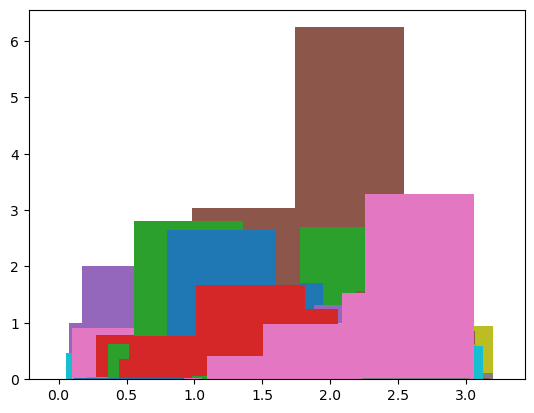

In [4]:
first_key = np.fromiter(a.keys(),dtype='<U32')[0] #output array here 

for detid in a[first_key]['det_ids']:
    a2s = []
    pwvs = []
    tres = {}
    pcov = []
    outlier_counts = [] # added
    tres[detid]={}
    tres[detid]['a2f'] = []
    tres[detid]['pwv']=[]
    tres[detid]['obsid']=[] 
    tres[detid]['fit_coeffs']=[]
    tres[detid]['fit_residuals']=[]
    tres[detid]['outlier_counts']=[]
    for i, k in enumerate(a.keys()):

        detidx = np.where(a[k]['det_ids'] == detid)[0]
        if len(detidx) != 0:
            if not(np.isclose(a[k]['a2f'][detidx[0]],0)):
                a2s.append(a[k]['a2f'][detidx[0]])
                pwvs.append(a[k]['pwv'])
    
    a2s = np.asarray(a2s)
    pwvs = np.asarray(pwvs)
    
    if len(pwvs) > 1 and len(a2s) > 1: 
        m = np.isfinite(pwvs) & np.isfinite(a2s)
        
        if np.sum(m) > 1:
            pfit, residuals, rank, singular_values, rcond = np.polyfit(pwvs[m], a2s[m], 1, rcond = 2e-3, full = True, w = None, cov = True) 
            pre = np.polyval(pfit,pwvs[m])
            ssr = np.sum((a2s[m] - pre)**2)
            sst = np.sum((a2s[m] - np.mean(a2s[m]))**2)
            
            if sst == 0: # added 
                r_squared = np.nan  #or any appropriate value indicating lack of variance
            else:  # added 
                r_squared = 1 - (ssr / sst)
           
            fit = np.polyval(pfit, pwvs[m])
            resi_cal = a2s[m] - fit
            ma = np.abs(resi_cal) > np.nanstd(resi_cal)
            
            plt.bar(pwvs[m][ma],a2s[m][ma])

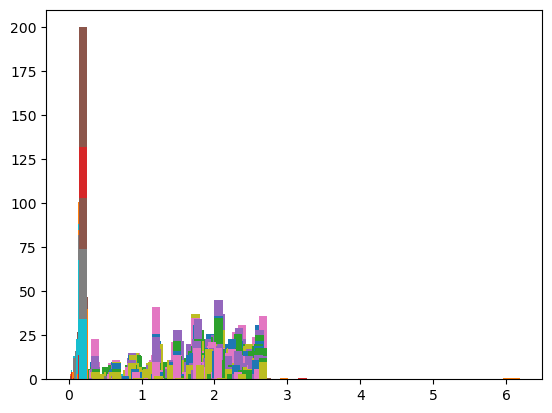

In [5]:
first_key = np.fromiter(a.keys(),dtype='<U32')[0] #output array here 

for detid in a[first_key]['det_ids']:
    a2s = []
    pwvs = []
    tres = {}
    pcov = []
    outlier_counts = [] # added
    tres[detid]={}
    tres[detid]['a2f'] = []
    tres[detid]['pwv']=[]
    tres[detid]['obsid']=[] 
    tres[detid]['fit_coeffs']=[]
    tres[detid]['fit_residuals']=[]
    tres[detid]['outlier_counts']=[]
    for i, k in enumerate(a.keys()):

        detidx = np.where(a[k]['det_ids'] == detid)[0]
        if len(detidx) != 0:
            if not(np.isclose(a[k]['a2f'][detidx[0]],0)):
                a2s.append(a[k]['a2f'][detidx[0]])
                pwvs.append(a[k]['pwv'])
    
    a2s = np.asarray(a2s)
    pwvs = np.asarray(pwvs)
    
    if len(pwvs) > 1 and len(a2s) > 1: 
        m = np.isfinite(pwvs) & np.isfinite(a2s)
        
        if np.sum(m) > 1:
            pfit, residuals, rank, singular_values, rcond = np.polyfit(pwvs[m], a2s[m], 1, rcond = 2e-3, full = True, w = None, cov = True) 
            pre = np.polyval(pfit,pwvs[m])
            ssr = np.sum((a2s[m] - pre)**2)
            sst = np.sum((a2s[m] - np.mean(a2s[m]))**2)
            
            if sst == 0: # added 
                r_squared = np.nan  #or any appropriate value indicating lack of variance
            else:  # added 
                r_squared = 1 - (ssr / sst)
           
            fit = np.polyval(pfit, pwvs[m])
            resi_cal = a2s[m] - fit
            ma = np.abs(resi_cal) > np.nanstd(resi_cal)
            error=(pwvs[m][ma],a2s[m][ma])
            plt.hist(error)